# CS579: Lecture 02
# Data Collection

<br><br>

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

<br><br><br><br><br><br>
<br><br><br><br><br><br>
<br><br><br><br><br><br>

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max 140 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[REST API](https://dev.twitter.com/docs/api/1.1)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://dev.twitter.com/docs/api/streaming)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://dev.twitter.com/docs/auth/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://dev.twitter.com/docs/auth/tokens-devtwittercom
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://dev.twitter.com/docs/twitter-libraries
<br><br><br><br><br><br>


In [1]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import ConfigParser
from TwitterAPI import TwitterAPI

def get_twitter(config_file):
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    config = ConfigParser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
                   config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter

twitter = get_twitter('twitter.cfg')
print 'Established Twitter connection.'

Established Twitter connection.


In [2]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [3]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(self, resource, params=None, files=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [4]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [5]:
# What object is returned?
# builtin type method will tell us.
type(request)
dir(request)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [6]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [7]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/2/tutorial/datastructures.html

In [8]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [9]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [10]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __cmp__(...)
 |      x.__cmp__(y) <==> cmp(x,y)
 |  
 |  __contains__(...)
 |      D.__contains__(k) -> True if D has a key k, else False
 |  
 |  __delitem__(...)
 |      x.__delitem__(y) <==> del x[y]
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x>y
 |  
 |  __init__(

In [11]:
# Print keys.
a_tweet.keys()

[u'contributors',
 u'truncated',
 u'text',
 u'is_quote_status',
 u'in_reply_to_status_id',
 u'id',
 u'favorite_count',
 u'source',
 u'retweeted',
 u'coordinates',
 u'entities',
 u'in_reply_to_screen_name',
 u'in_reply_to_user_id',
 u'retweet_count',
 u'id_str',
 u'favorited',
 u'user',
 u'geo',
 u'in_reply_to_user_id_str',
 u'lang',
 u'created_at',
 u'in_reply_to_status_id_str',
 u'place',
 u'metadata']

In [12]:
# The text.
print a_tweet['text']
print a_tweet['created_at']

Somebody told me to move to Chicago. But it's illegal to have spray paint. I'd get arrested too much.
Wed Aug 26 17:06:30 +0000 2015


In [17]:
# What is a user?...another dict
a_tweet['user']

{u'contributors_enabled': False,
 u'created_at': u'Wed Apr 22 23:25:25 +0000 2009',
 u'default_profile': False,
 u'default_profile_image': False,
 u'description': u'I once was cool as the Fonz was.... \n\nIG: dryehumor',
 u'entities': {u'description': {u'urls': []},
  u'url': {u'urls': [{u'display_url': u'SeeDrye.com',
     u'expanded_url': u'http://www.SeeDrye.com',
     u'indices': [0, 22],
     u'url': u'http://t.co/2zph8zBTiM'}]}},
 u'favourites_count': 350,
 u'follow_request_sent': False,
 u'followers_count': 1435,
 u'following': False,
 u'friends_count': 992,
 u'geo_enabled': True,
 u'has_extended_profile': False,
 u'id': 34441108,
 u'id_str': u'34441108',
 u'is_translation_enabled': False,
 u'is_translator': False,
 u'lang': u'en',
 u'listed_count': 20,
 u'location': u'At yo momma house... Chillin. ',
 u'name': u'Opposite of WEThumor',
 u'notifications': False,
 u'profile_background_color': u'642D8B',
 u'profile_background_image_url': u'http://pbs.twimg.com/profile_background_im

In [19]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=dryehumor, name=Opposite of WEThumor, location=At yo momma house... Chillin. 


In [20]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print 'found %d followers for %s' % (len(followers), screen_name)
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for dryehumor


In [23]:
print type(followers[0])

<type 'dict'>


In [24]:
print followers[0].keys()

[u'follow_request_sent', u'has_extended_profile', u'profile_use_background_image', u'default_profile_image', u'id', u'profile_background_image_url_https', u'verified', u'blocked_by', u'profile_text_color', u'muting', u'profile_image_url_https', u'profile_sidebar_fill_color', u'entities', u'followers_count', u'profile_sidebar_border_color', u'id_str', u'profile_background_color', u'listed_count', u'status', u'is_translation_enabled', u'utc_offset', u'statuses_count', u'description', u'friends_count', u'location', u'profile_link_color', u'profile_image_url', u'following', u'geo_enabled', u'profile_banner_url', u'blocking', u'profile_background_image_url', u'screen_name', u'lang', u'profile_background_tile', u'favourites_count', u'name', u'notifications', u'url', u'created_at', u'contributors_enabled', u'time_zone', u'protected', u'default_profile', u'is_translator']


In [25]:
print followers[0]['screen_name']

willis203


In [26]:
# What happens if we get an error?
request = twitter.request('followers/list', {'screen_name': 'this_is_not_a_valid_screen_name', 'count':200})

In [29]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [30]:
request.status_code

404

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://dev.twitter.com/docs/rate-limiting/1.1/limits
  - e.g., 180 requests in 15 minute window

In [10]:
# Working around rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print >> sys.stderr, 'Got error:', request.text, '\nsleeping for 15 minutes.'
            sys.stderr.flush()
            time.sleep(61 * 15)

## Drawing graphs with NetworkX

In [31]:
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [32]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

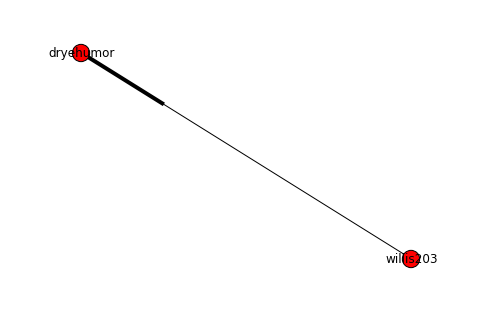

In [36]:
nx.draw(graph, with_labels=True)

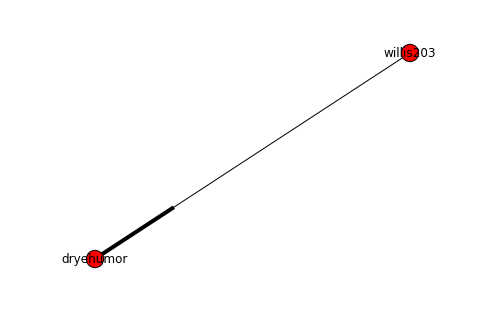

In [34]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

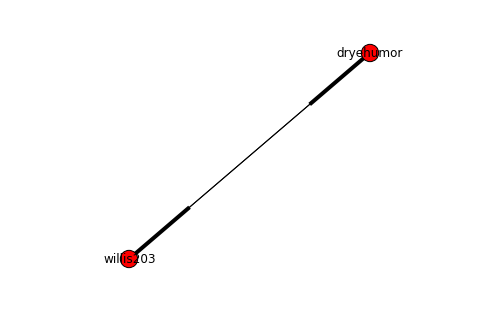

In [37]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [46]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                 'count': 200})]
print 'got %d tweets for user %s' % (len(timeline), screen_name)

got 200 tweets for user dryehumor


In [47]:
# Print the text.
print '\n'.join(t['text'] for t in timeline)

To keep It a bean .... I miss everything about her.
Now MF's quiet ..... 😂.
I'm walking on thin ice now. Maybe I should change the subject.
....... But what do u consider "talking?" 😂😂😂😂
Everybody has somebody .... U might be single but u talking to or smashing somebody. That's real life.
@EV937 he gon eff some ish up
I can't mess with girls who into the zodiac. I don't fool with astrology. I just seek God.
@EV937 a big gun. I need a "1"
Trying not to let shit surface. Speaking in circles
Somebody told me to move to Chicago. But it's illegal to have spray paint. I'd get arrested too much.
My perception is reflection.
But I keep it real with everybody. MF's can't deny that.
Every time I regret something, I look in my mirror and ask myself "why" - I talk to myself. Then I try to forget it. I'm ashamed.
I realize I regret a lot. I wish I could change some things around.
Preach RT @Hel_Rel3: Lying bout what you doin ain't gon get u respected
National dog day ..... Ima take a picture of me.

In [50]:
# Count words
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1127 unique terms in 200 tweets


[(u'i', 94),
 (u'to', 70),
 (u'rt', 56),
 (u'a', 53),
 (u'the', 49),
 (u"i'm", 41),
 (u'my', 39),
 (u'and', 34),
 (u'u', 33),
 (u'be', 22)]

In [49]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print '\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts)

i=94
to=70
rt=56
a=53
the=49
i'm=41
my=39
and=34
u=33
be=22
for=22
it=21
in=21
of=21
you=21
me=20
that=20
on=20
don't=16
but=16
up=15
is=14
with=13
just=13
what=12
got=12
go=11
not=11
have=11
do=11
about=11
all=10
so=10
at=10
from=9
this=9
out=9
get=9
had=9
here=8
ain't=8
that's=8
they=8
need=8
even=8
😂😂😂😂=8
we=8
it's=8
...=8
....=8
as=8
now=7
@talardastar=7
can't=7
life=7
if=7
back=7
shit=7
no=7
want=6
college=6
-=6
who=6
only=6
😂😂😂=6
has=6
nigga=6
some=6
@j12nation_=6
people=6
bruh=6
was=6
he=6
up.=5
yall=5
i'll=5
@waynegrindhard=5
lol=5
&amp;=5
would=5
tell=5
could=5
regret=5
gotta=5
episode=5
@naturalbb_conn=5
can=5
@joshuathotties=5
look=5
funny=5
off=5
know=5
or=5
@taxstone:=4
.....=4
did=4
makes=4
next=4
didn't=4
@joebudden=4
how=4
😩😩😩=4
years=4
still=4
ima=4
it.=4
then=4
good=4
somebody=4
keep=4
one=4
miss=4
"=4
too=4
talking=4
take=4
help=4
never=4
ish.=4
now.=4
damn=4
will=4
things=4
make=4
being=4
day=4
like=4
@christiandrye:=4
your=4
right=4
stay=4
time=4
month=3
forget=3
e

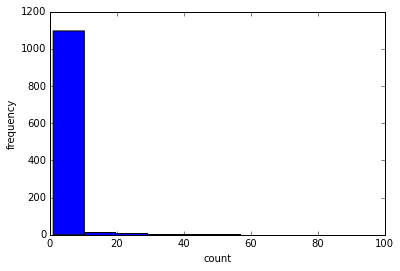

In [51]:
# Plot these counts.
plt.hist(counts.values())
plt.xlabel('count')
plt.ylabel('frequency')
plt.show()